In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [2]:
# Load the data

data = pd.read_csv('/content/drive/MyDrive/Real & Fake Job Advertisement using NLP & ML/fake_job_postings.csv')

In [3]:
data.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
data.shape

(17880, 18)

In [5]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [6]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
# drop the irrelevant columns
data.drop(['job_id', 'salary_range'], axis = 1, inplace = True)

In [8]:
data.head()

title            location department  \
0                           Marketing Intern    US, NY, New York  Marketing   
1  Customer Service - Cloud Video Production      NZ, , Auckland    Success   
2    Commissioning Machinery Assistant (CMA)       US, IA, Wever        NaN   
3          Account Executive - Washington DC  US, DC, Washington      Sales   
4                        Bill Review Manager  US, FL, Fort Worth        NaN   

                                     company_profile  \
0  We're Food52, and we've created a groundbreaki...   
1  90 Seconds, the worlds Cloud Video Production ...   
2  Valor Services provides Workforce Solutions th...   
3  Our passion for improving quality of life thro...   
4  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [ ]:
data.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Exploratory Data Analysis

([<matplotlib.patches.Wedge at 0x7f0664d688b0>,
 [Text(-1.1861351897986643, 0.18188818411674518, 'Real'),
  Text(1.1861351812838625, -0.1818882396437407, 'Fake')],
 [Text(-0.6919121940492208, 0.106101440734768, '95.2%'),
  Text(0.691912189082253, -0.1061014731255154, '4.8%')])

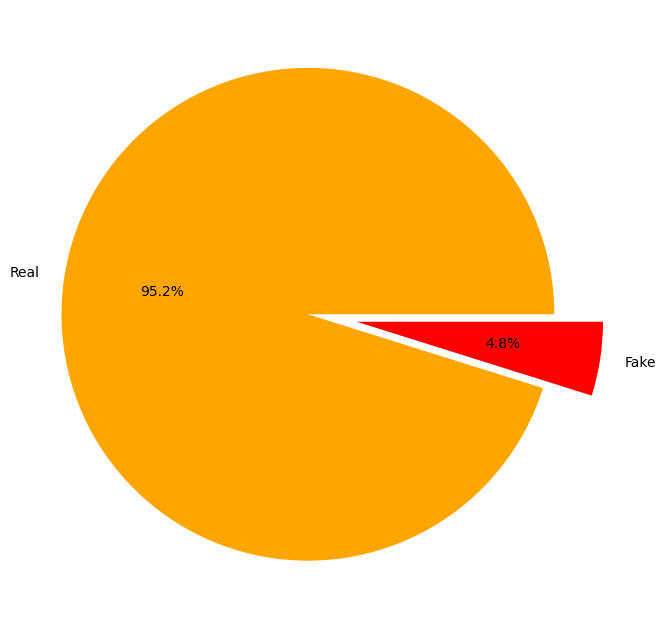

In [10]:
# Class Distribution

plt.figure(figsize=(11, 8))
labels = ['Real', 'Fake']
explode = [.1, .1]
mycolors = ['Orange', 'Red']
sizes = data['fraudulent'].value_counts().values

plt.pie(x = sizes, explode = explode, labels = labels, colors = mycolors, autopct = "%1.1f%%")

In [11]:
data['department'].nunique()

1337

In [12]:
## Fill the missing values
data.fillna(' ', inplace = True)

In [13]:
data.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<Axes: xlabel='has_questions', ylabel='count'>

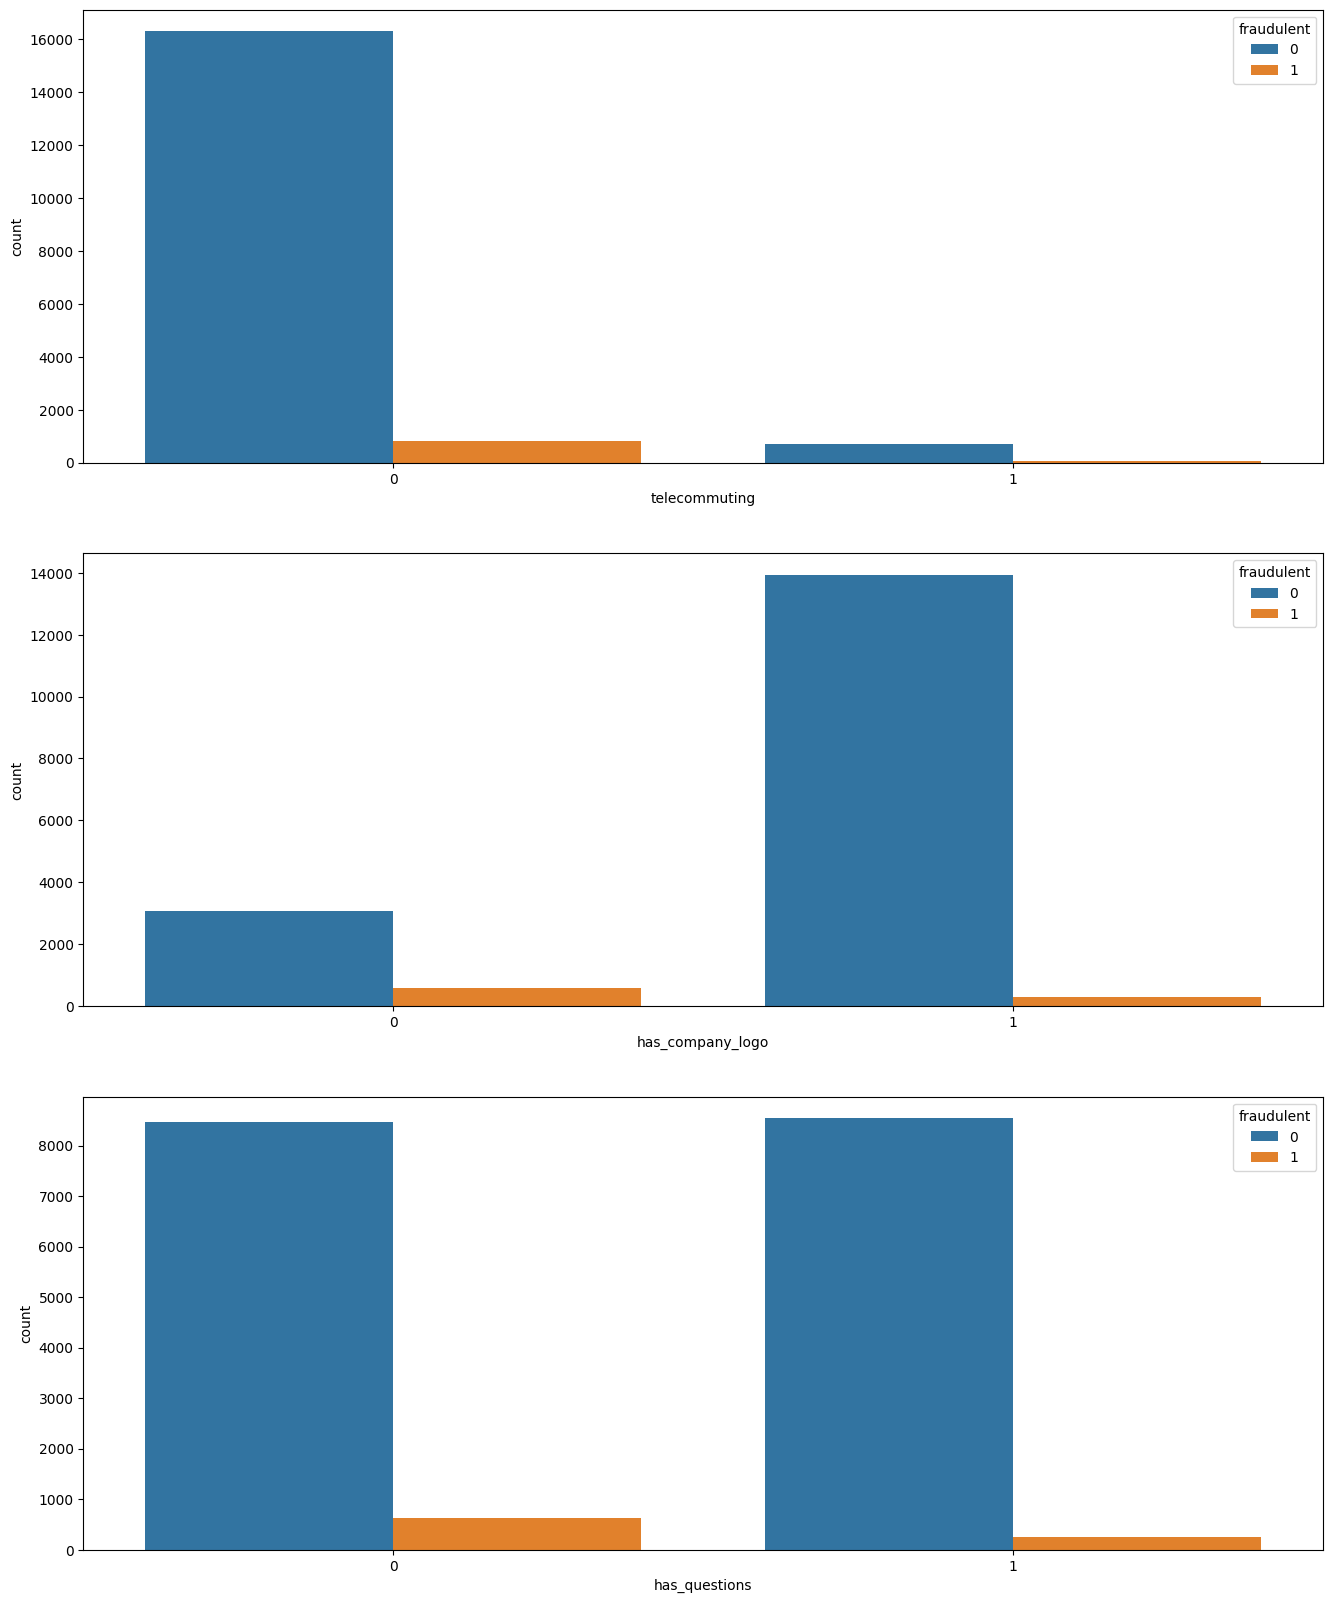

In [14]:
# Analyze the relation of telecommunicating, company logo, and has questions with fraudulent

fig, ax = plt.subplots(3, 1, figsize = (16, 20))
sns.countplot(x = 'telecommuting', hue = 'fraudulent', data = data, ax = ax[0])
sns.countplot(x = 'has_company_logo', hue = 'fraudulent', data = data, ax = ax[1])
sns.countplot(x = 'has_questions', hue = 'fraudulent', data = data, ax = ax[2])

In [15]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [17]:
data['employment_type'].value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

<Axes: xlabel='required_education', ylabel='count'>

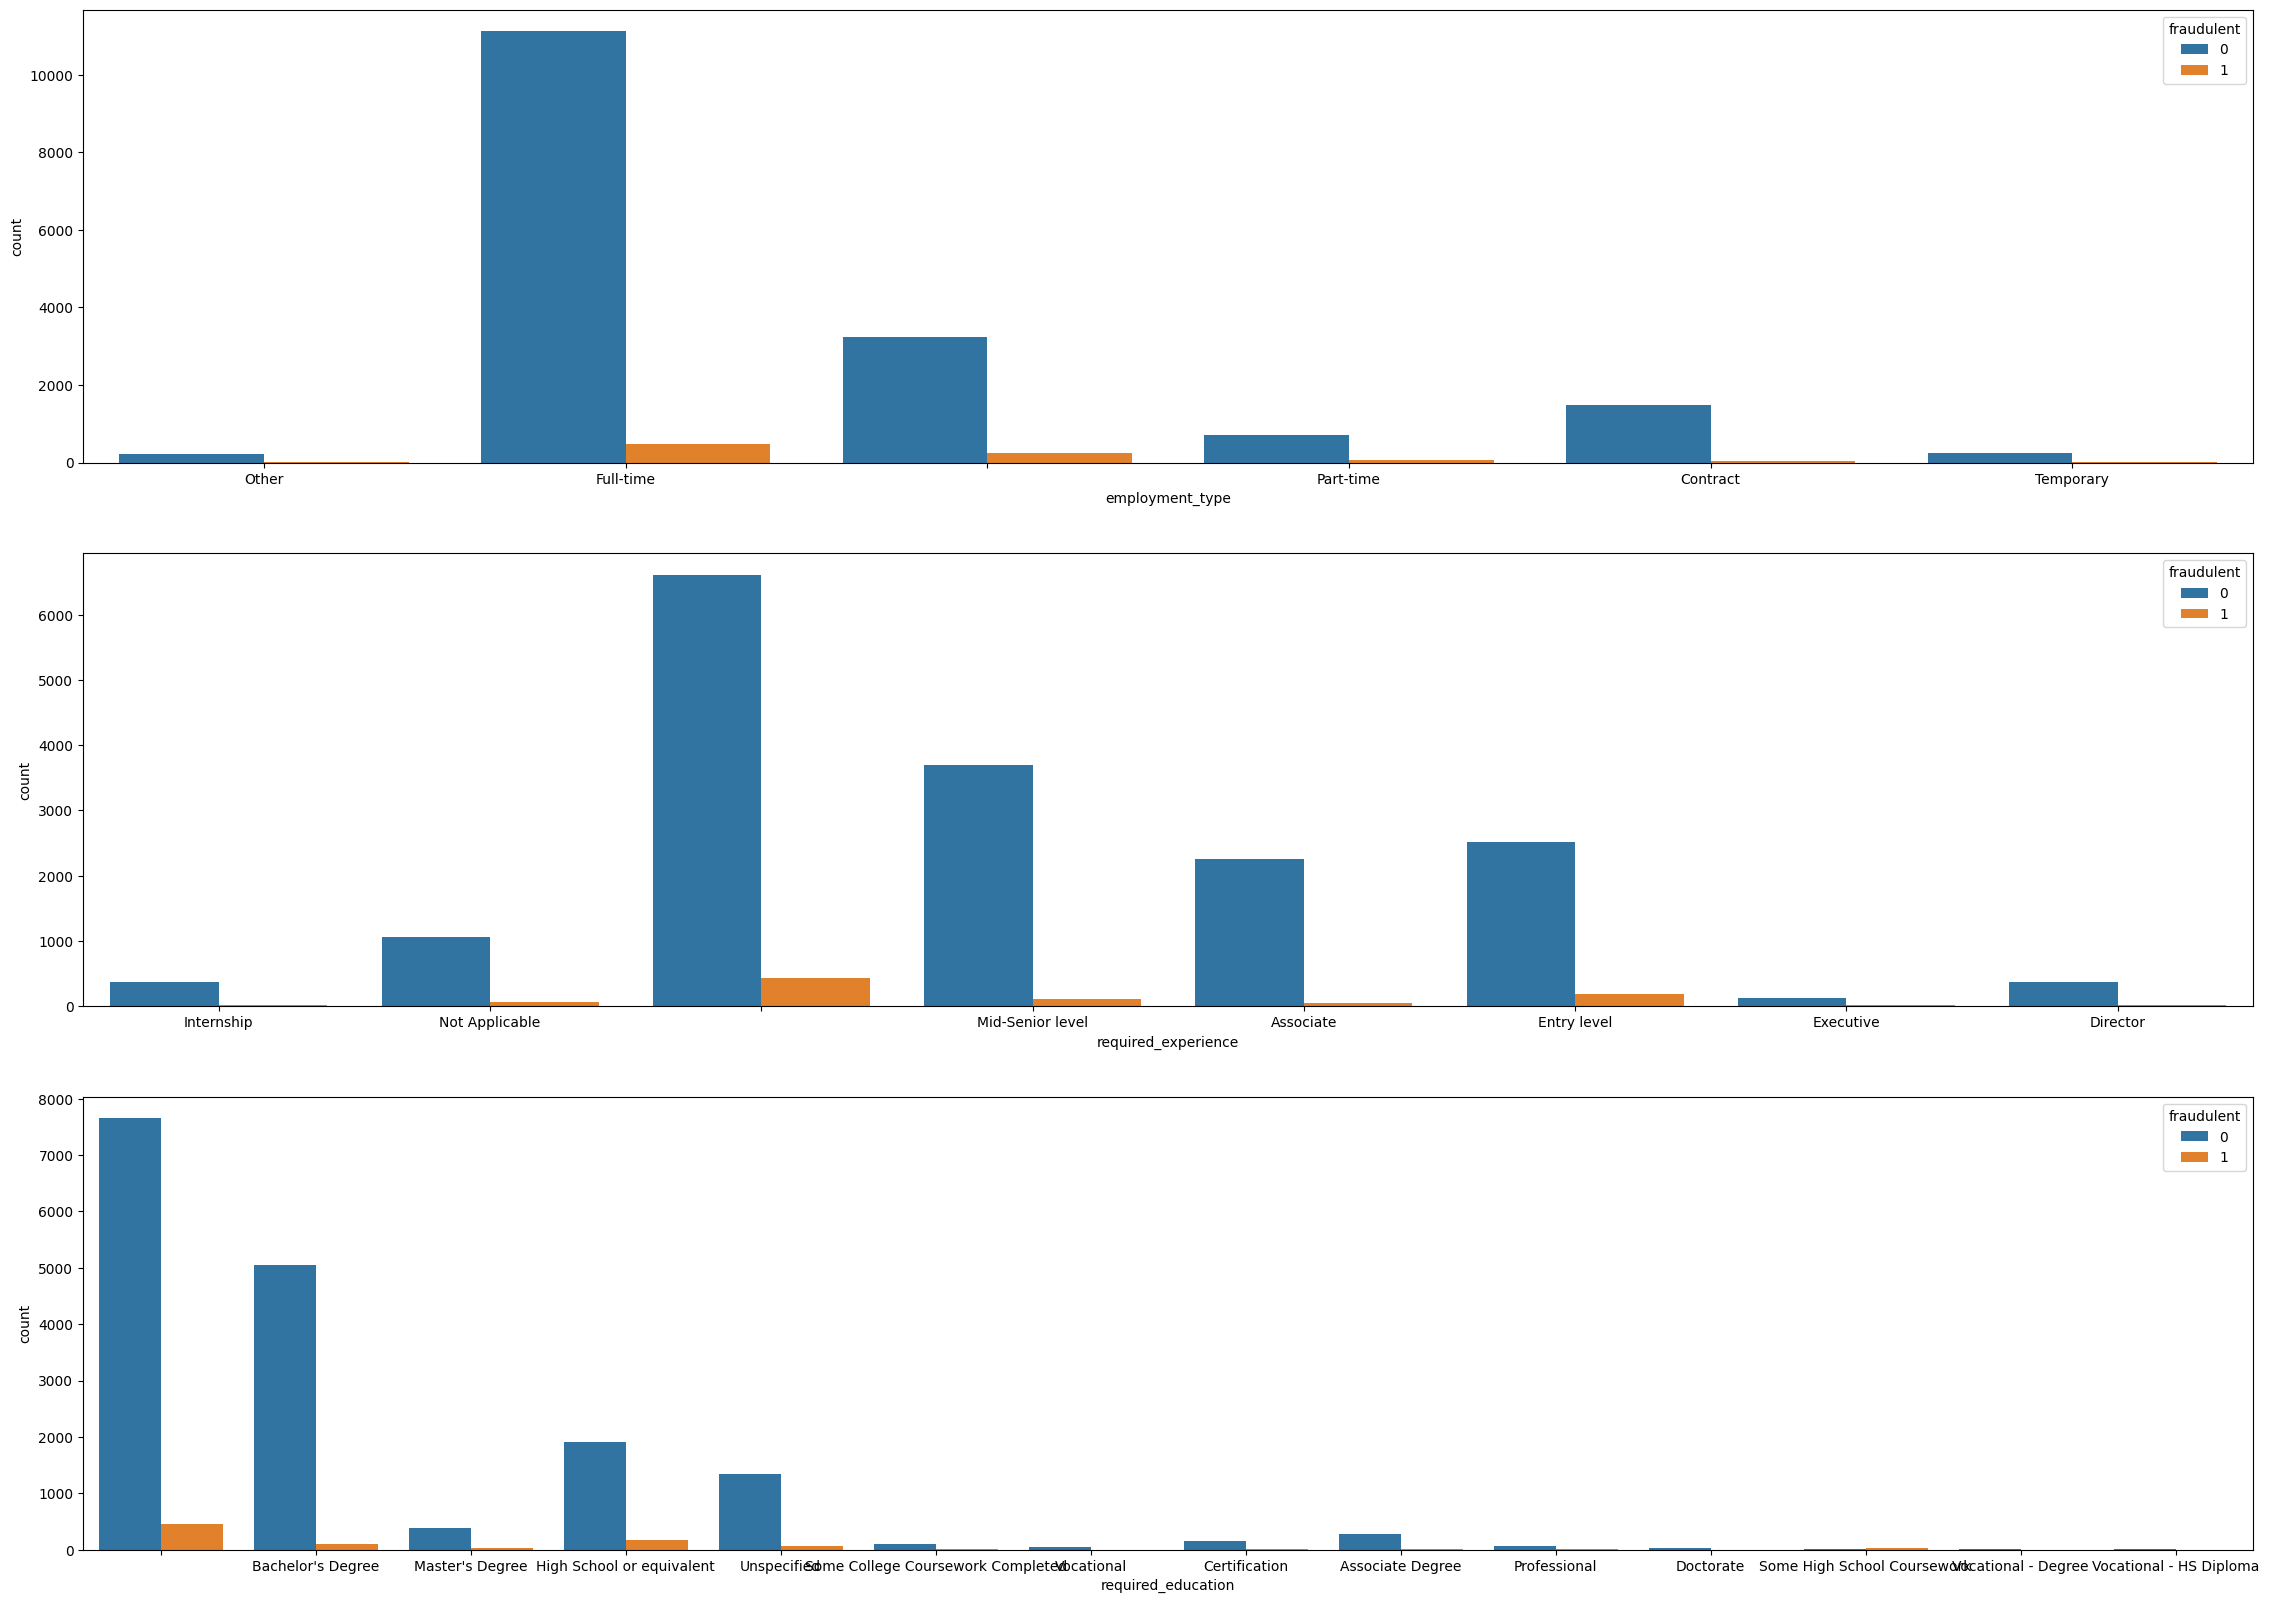

In [20]:
fig, ax = plt.subplots(3, 1, figsize = (28, 20))
sns.countplot(x = 'employment_type', hue = 'fraudulent', data = data, ax = ax[0])
sns.countplot(x = 'required_experience', hue = 'fraudulent', data = data, ax = ax[1])
sns.countplot(x = 'required_education', hue = 'fraudulent', data = data, ax = ax[2])

In [21]:
# Analyze the relation between Job title and Fraudulent job post

data[data.fraudulent == 1].title.value_counts()[:15]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Lawn and Maintenance Cont

In [22]:
data.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent'],
      dtype='object')

In [23]:
## String Concatenation

data['Text'] = data['title']+' '+data['department']+' '+data['description']+' '+data['function']+' '+data['industry']+' '+data['location']+' '+data['required_education']+' '+data['benefits']+' '+data['company_profile']+' '+data['required_experience']+' '+data['requirements']+' '+data['title']

In [24]:
data.drop(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function'], axis = 1, inplace = True)

In [25]:
data.head()

fraudulent                                               Text
0           0  Marketing Intern Marketing Food52, a fast-grow...
1           0  Customer Service - Cloud Video Production Succ...
2           0  Commissioning Machinery Assistant (CMA)   Our ...
3           0  Account Executive - Washington DC Sales THE CO...
4           0  Bill Review Manager   JOB TITLE: Itemization R...

In [30]:
data.Text[2]

'Commissioning Machinery Assistant CMA   Our client located in Houston is actively seeking an experienced Commissioning Machinery Assistant that possesses strong supervisory skills and has an attention to detail A strong dedication to safety is a must The ideal candidate will execute all activities while complying with quality requirements and health environmental and safety regulations     US IA Wever     Valor Services provides Workforce Solutions that meet the needs of companies across the Private Sector with a special focus on the Oil amp Gas Industry\xa0Valor Services will be involved with you throughout every step of the hiring process and remain in contact with you all the way through the final step of signing of the employment contract with your new employer\xa0Valor Services was founded with the vision of employing the unique skills experiences and qualities of America’s finest veterans to provide Private Sector companies with precise and concerted valueadded services – and Am

## Data - Preprocessing

#### Removing Punctuation

In [27]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [28]:
data['Text'] = data['Text'].apply(remove_punc)

In [29]:
data.Text[3]

'Account Executive  Washington DC Sales THE COMPANY ESRI – Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do\xa0 Esri’s geographic information system GIS technology inspires and enables governments universities and businesses worldwide to save money lives and our environment through a deeper understanding of the changing world around themCarefully managed growth and zero debt give Esri stability that is uncommon in todays volatile business world\xa0 Privately held we offer exceptional benefits competitive salaries 401k and profitsharing programs opportunities for personal and professional growth and much moreTHE OPPORTUNITY Account ExecutiveAs a member of the Sales Division you will work collaboratively with an account team in order to sell and promote adoption of Esri’s ArcGIS platform within an organization As part of an account team you will be responsible for facilitating the development and execu

#### Remove Numbers, Characters and anything else except alphabets

In [31]:
def remove_noise(text):
  t = re.sub('[^a-zA-Z]', ' ', text)
  return t

In [32]:
data['Text'] = data['Text'].apply(remove_noise)

In [33]:
data.Text[3]

'Account Executive  Washington DC Sales THE COMPANY ESRI   Environmental Systems Research InstituteOur passion for improving quality of life through geography is at the heart of everything we do  Esri s geographic information system GIS technology inspires and enables governments universities and businesses worldwide to save money lives and our environment through a deeper understanding of the changing world around themCarefully managed growth and zero debt give Esri stability that is uncommon in todays volatile business world  Privately held we offer exceptional benefits competitive salaries    k and profitsharing programs opportunities for personal and professional growth and much moreTHE OPPORTUNITY Account ExecutiveAs a member of the Sales Division you will work collaboratively with an account team in order to sell and promote adoption of Esri s ArcGIS platform within an organization As part of an account team you will be responsible for facilitating the development and execution o

#### Remove Stopwords

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
from nltk.corpus import stopwords

In [36]:
sw = stopwords.words('english')

In [37]:
len(sw)

179

In [38]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [39]:
data['Text'] = data['Text'].apply(remove_sws)

In [40]:
data.Text[3]

'account executive washington dc sales company esri environmental systems research instituteour passion improving quality life geography heart everything esri geographic information system gis technology inspires enables governments universities businesses worldwide save money lives environment deeper understanding changing world around themcarefully managed growth zero debt give esri stability uncommon todays volatile business world privately held offer exceptional benefits competitive salaries k profitsharing programs opportunities personal professional growth much morethe opportunity account executiveas member sales division work collaboratively account team order sell promote adoption esri arcgis platform within organization part account team responsible facilitating development execution set strategies defined portfolio accounts executing strategies utilize experience enterprise sales help customers leverage geospatial information technology achieve business goals specifically pro

#### Lemmatization

In [41]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [42]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [43]:
data['Text'] = data['Text'].apply(lemma)

In [44]:
data.Text[3]

'account executive washington dc sale company esri environmental system research instituteour passion improving quality life geography heart everything esri geographic information system gi technology inspires enables government university business worldwide save money life environment deeper understanding changing world around themcarefully managed growth zero debt give esri stability uncommon today volatile business world privately held offer exceptional benefit competitive salary k profitsharing program opportunity personal professional growth much morethe opportunity account executiveas member sale division work collaboratively account team order sell promote adoption esri arcgis platform within organization part account team responsible facilitating development execution set strategy defined portfolio account executing strategy utilize experience enterprise sale help customer leverage geospatial information technology achieve business goal specifically prospect develop opportunity

## Plot the Word Cloud

In [45]:
real_post = data[data.fraudulent == 0].Text
fake_post = data[data.fraudulent == 1].Text

In [46]:
real_post

0        marketing intern marketing food fastgrowing ja...
1        customer service cloud video production succes...
2        commissioning machinery assistant cma client l...
3        account executive washington dc sale company e...
4        bill review manager job title itemization revi...
                               ...                        
17875    account director distribution sale case first ...
17876    payroll accountant accounting payroll accounta...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studio looking experie...
17879    web application developer engineering wevend a...
Name: Text, Length: 17014, dtype: object

### Common Words in Real Job Post

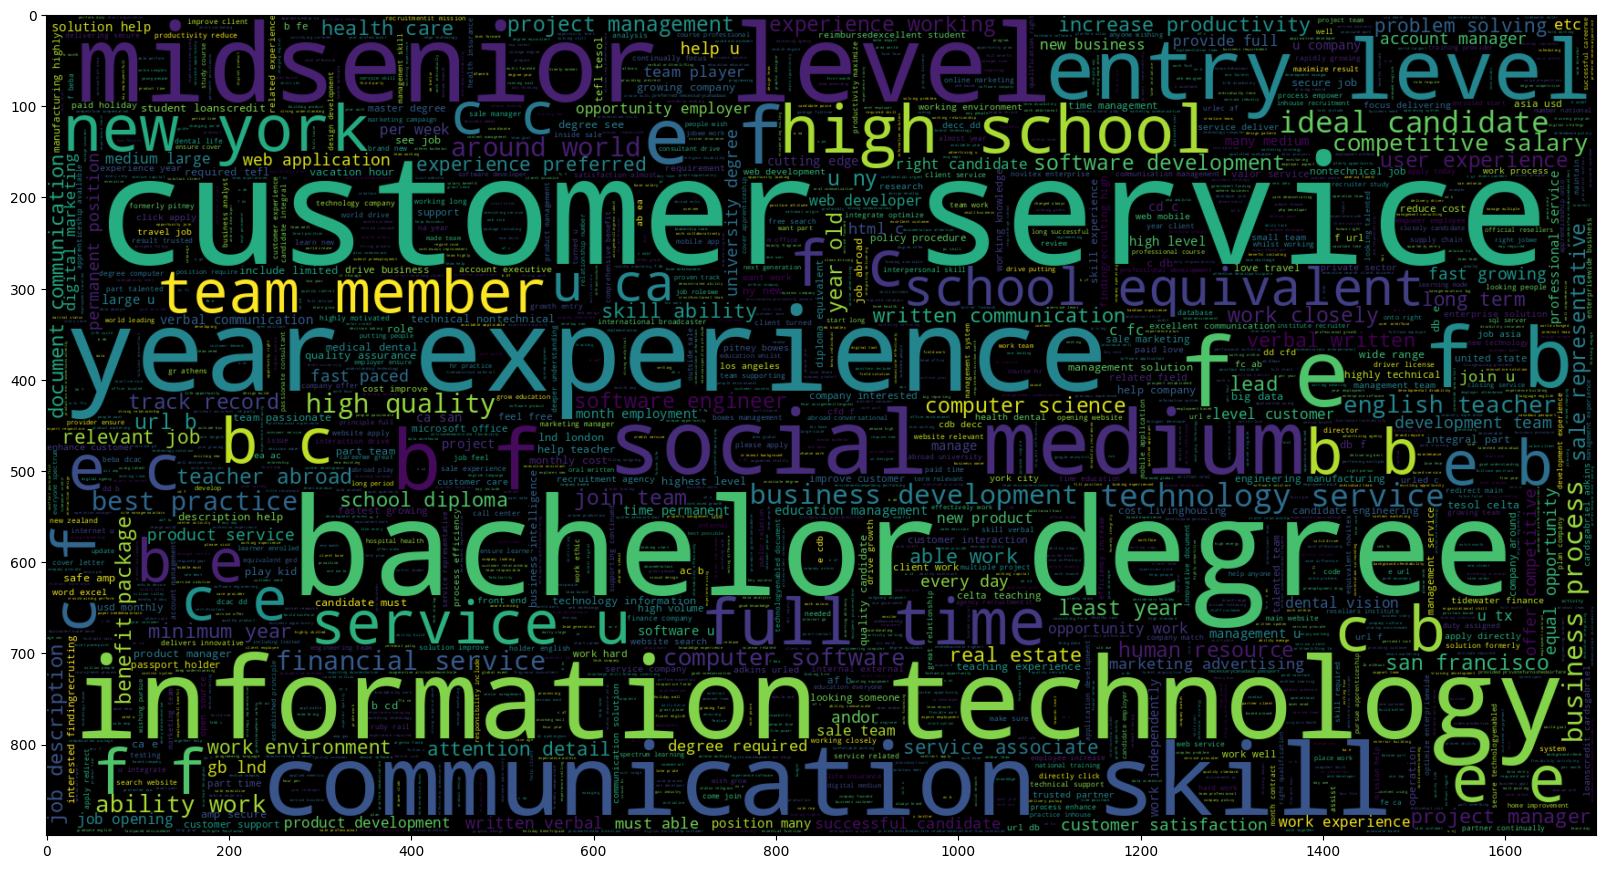

In [47]:
from wordcloud import WordCloud
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(real_post))
plt.imshow(wc, interpolation='bilinear')

### Common Words in Fake Job Post

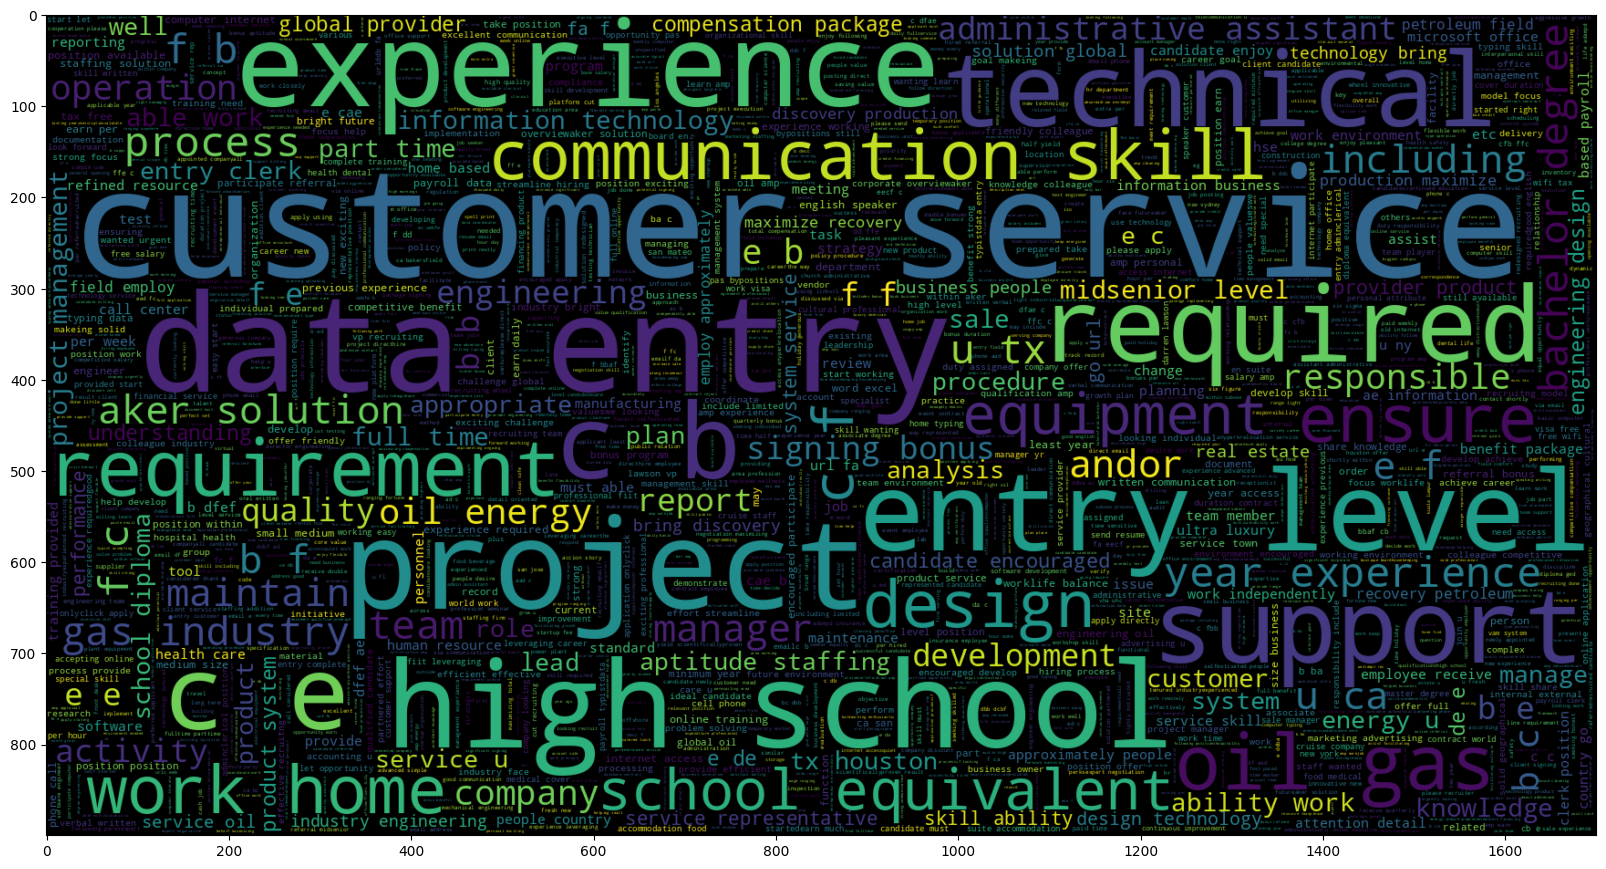

In [48]:
plt.figure(figsize = (20, 22))

wc = WordCloud(width = 1700, height = 900, max_words = 2500).generate(" ".join(fake_post))
plt.imshow(wc, interpolation='bilinear')

## Feature Extraction

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(max_features = 2500)

# Bag of Word Model

In [52]:
X = cv.fit_transform(data['Text']).toarray()
y = data['fraudulent']

In [53]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
X = pd.DataFrame(X)

In [55]:
X

0     1     2     3     4     5     6     7     8     9     ...  2490  \
0         0     0     0     0     0     0     0     0     0     0  ...     0   
1         0     0     1     0     0     1     0     1     0     0  ...     0   
2         0     0     0     0     0     0     0     0     0     0  ...     0   
3         0     0     0     0     1     0     0     0     0     0  ...     0   
4         0     0     0     0     0     1     0     0     0     0  ...     0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
17875     0     0     0     0     1     0     0     0     0     0  ...     0   
17876     1     0     0     0     2     1     0     0     0     0  ...     0   
17877     0     0     0     0     0     1     0     0     0     0  ...     0   
17878     0     0     0     0     0     2     0     0     0     0  ...     0   
17879     0     0     0     0     0     0     0     0     0     0  ...     0   

       2491  2492  2493  2494  2495  2496  2497  2498  2499  
0         0     0     4     0     0     0     0     0     0  
1         0     0     0     0     0     0     0     0     0  
2         0     0     0     0     0     0     0     0     0  
3         0     0     0     0     0     0     0     0     0  
4         0     0     0     0     0     0     0     0     0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
17875     0     0     0     3     0     0     0     0     0  
17876     0     0     0     0     0     0     0     0     0  
17877     0     0     0     0     0     0     0     0     0  
17878     0     0     0     0     0     0     0     0     0  
17879     0     0     0     1     0     0     0     0     0  

[17880 rows x 2500 columns]

### Balancing the Data

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 24)

In [57]:
X_sm, y_sm = sm.fit_resample(X, y)

In [58]:
## Data Splitting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 32)

## Model Building & Evaluation

In [59]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [60]:
# Fit the data

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Make a prediction

y_pred = dt.predict(X_test)

In [62]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [63]:
# Accuracy Score

accuracy_score(y_test, y_pred)

0.9759036144578314

In [64]:
#F1-score

f1_score(y_test, y_pred)

0.9760023412350015

In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [66]:
# Fit the data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
# Make a prediction

y_pred_rf = rf.predict(X_test)

In [68]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3415
           1       0.97      0.98      0.98      3391

    accuracy                           0.98      6806
   macro avg       0.98      0.98      0.98      6806
weighted avg       0.98      0.98      0.98      6806



## TF-IDF Model

In [69]:
tf = TfidfVectorizer(max_features=2500)

X1 = tf.fit_transform(data['Text']).toarray()
y1 = data['fraudulent']

In [70]:
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01893216, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [71]:
X1 = pd.DataFrame(X1)

In [72]:
# Balancing

x_sm, y_sm = sm.fit_resample(X1, y1)

In [73]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.2, random_state = 32)

In [74]:
X_train.shape, y_train.shape

((27222, 2500), (27222,))

In [75]:
# Model1

clf1 = DecisionTreeClassifier()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
# Prediction

y_pred_tf1 = clf1.predict(X_test)

In [77]:
# Report

print(classification_report(y_test, y_pred_tf1))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3415
           1       0.96      0.99      0.97      3391

    accuracy                           0.97      6806
   macro avg       0.97      0.97      0.97      6806
weighted avg       0.97      0.97      0.97      6806



In [78]:
# Model 2

clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# Prediction

y_pred_tf2 = clf2.predict(X_test)

In [80]:
# Accuracy Score

accuracy_score(y_test, y_pred_tf2)

0.9982368498383779

In [81]:
# Report

print(classification_report(y_test, y_pred_tf2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3415
           1       1.00      1.00      1.00      3391

    accuracy                           1.00      6806
   macro avg       1.00      1.00      1.00      6806
weighted avg       1.00      1.00      1.00      6806



In [82]:
y_test.shape

(6806,)

Text(120.72222222222221, 0.5, 'Truth')

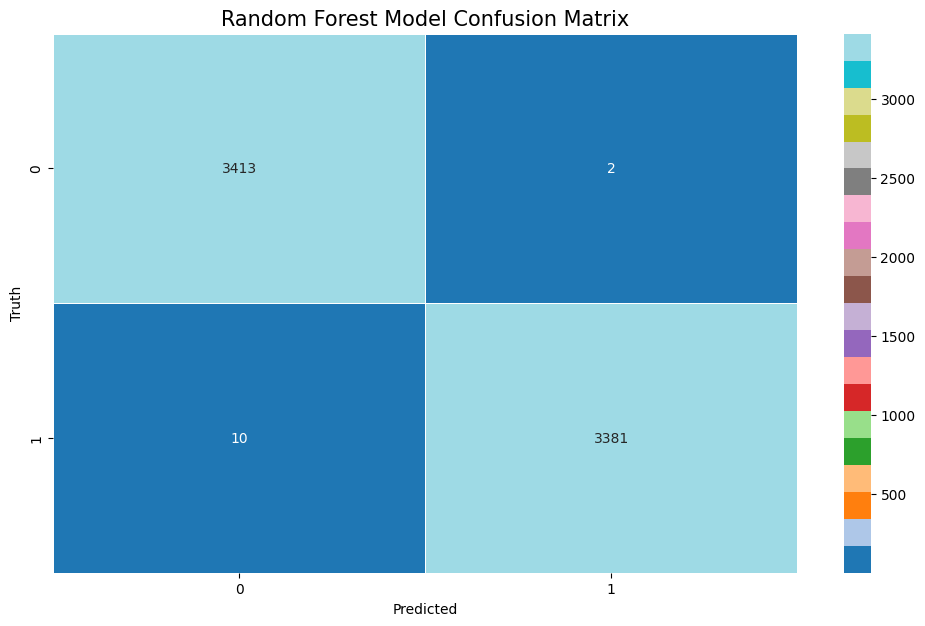

In [83]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred_tf2)

plt.figure(figsize = (12,7))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Random Forest Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [84]:
data['Text'][50]

'food production manager pgi food production company production november pure ground ingredient pgiin carson citypgi fast growing organic herbspicebotanicals importing production company utilizes extensive food safety handling management practice insure quality product currently number open position shipping warehouse production operationsfood production manager experience managing staff processing including milling blending packing roasting micro treatment operation etc experience osha haccp industry foodsafety standard policy experience manage physical plant operation including electrical food production machineryall applicant must submit drug background screeningcompany equal opportunity employer production food beverage u nv carson city high school equivalent pgi fast growing organic herbspicebotanicals importing production company utilizes extensive food safety handling management practice insure quality product entry level manager role requirement multilingual english amp spanish

## Making Prediction on New Post

In [85]:
input_text = ['accounting clerk job overviewapex environmental consulting firm offer stable leadership growth view employee valuable resource seeking selfmotivated multifaceted account payable clerk join team rockville md become integral part continued success story position entail processing high volume invoice working fast pace environment keying verifying various type invoice general ledger account job number submitted vendor company personnel calculating balance due vendor reviewing history prior payment made account candidate must able answer vendor personnel inquiry via phone email qualificationsthis position requires high school diploma year relevant work experience keen attention detail knowledge commonlyused concept practice procedure within accounting field experience accounting software proficiency m office suite including advanced excel experience high degree professionalismwant join team talented accounting professional engineer manager submit resume consideration todayurlf e ff e e e f fdedb dbfebfeb e e ead apexapex customerfocused company delivers environmental health safety engineering service client across united state abroad driven entrepreneurial spirit dedication providing responsive costeffective solution apex grown rapidly since founding working partnership public private sector client team expert provides service tailored support customer unique goal objective blending strong technical skill business acumen superior customer service able deliver creative solution deliver high quality result low costfrom commercial industrial firm construction petroleum utility company financial institution government client apex extensive experience wide variety industry corporate professional resume includes proven capability area water resource remediation restoration assessment compliance industrial hygiene among othersranked top environmental firm enr magazine ranked among top design firm enr magazine awarded national environmental excellence award environmental stewardship national association environmental professional selected hot firm zweig letter come join award winning teamapex entrepreneurial firm ensuring senior manager able move unencumbered priority successful growing midsized firm small enough employee still access leadership easy highperformers recognized contribution advance without bureaucracy office location big enough provide comprehensive environmental consulting engineering service diverse client base provide resource employee help professional development offer incentive bonus plan ownership opportunity successful managersapex company llc affirmative actionequal opportunity employer u md accounting clerk']

# convert the text into vector
#tfidf = TfidfVectorizer(max_features=2000)
input_data_features = tf.transform(input_text)
data_features = pd.DataFrame(input_data_features.toarray())

# Making Prediction
prediction = clf1.predict(data_features)
print(prediction)


if (prediction[0]==1):
    print("It's a Fraudulant Job")

else:
    print("It's a Real Job")

[0]
It's a Real Job
